In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def load(filename, names=["time[ms]"]):
  df = pd.read_csv(filename, names=names)
  return df

In [5]:
# Ping

df = load("ping.csv")
df.describe()

,time[ms]
count,10.000000
mean,3.279156
std,0.622282
min,2.119800
25%,3.409222
50%,3.463655
75%,3.538830
max,3.929330


In [6]:
# Flushing

df_e_l = load("bm_flush_empty_local.csv", ["empty_local"])
df_e_r = load("bm_flush_empty_remote.csv", ["empty_remote"])
df_f_l = load("bm_flush_full_local.csv", ["full_local"])
df_f_r = load("bm_flush_full_remote.csv", ["full_remote"])

df = pd.concat([df_e_l, df_e_r, df_f_l, df_f_r], axis=1)
df.describe()


,empty_local,empty_remote,full_local,full_remote
count,10.000000,10.000000,10.000000,10.000000
mean,53.121690,51.843820,60.316160,88.571620
std,0.006631,0.015766,1.710627,1.531980
min,53.115100,51.824100,57.797300,85.993500
25%,53.117125,51.832725,58.734875,87.310275
50%,53.120500,51.843850,61.328350,89.142800
75%,53.124150,51.851175,61.351050,89.855050
max,53.137300,51.878300,61.517500,89.991200


In [7]:
df = load("bm_serializer.csv")
df.describe()

,time[ms]
count,10.000000
mean,0.058100
std,0.031765
min,0.046725
25%,0.047409
50%,0.047718
75%,0.048823
max,0.148414


In [8]:
df = load("bm_deserializer.csv")
df.describe()

,time[ms]
count,10.000000
mean,0.019402
std,0.028565
min,0.008934
25%,0.009036
50%,0.009169
75%,0.010873
max,0.100259


In [9]:
df = pd.concat([load("bm_malloc_local.csv", ["Local"]), load("bm_malloc_remote.csv", ["Remote"])], axis=1)
df.describe()

,Local,Remote
count,10.000000,10.000000
mean,3.130525,4.988670
std,0.478940,0.862351
min,2.286840,3.596790
25%,2.804440,4.391825
50%,3.137410,5.186720
75%,3.517087,5.754635
max,3.778710,5.847690


In [10]:
df = load("bm_deserializer.csv")
df.describe()

,time[ms]
count,10.000000
mean,0.019402
std,0.028565
min,0.008934
25%,0.009036
50%,0.009169
75%,0.010873
max,0.100259


[Text(0, 0.5, 'Time [s]')]

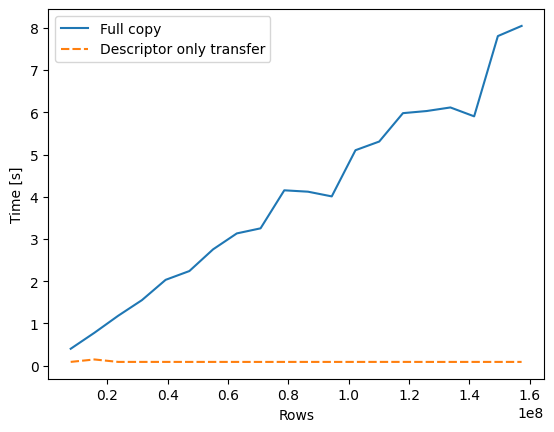

In [11]:
headers = ["i", "rows", "Transfer time [ms]"]

df = pd.concat(
    [load("bm_transfer_full.csv", ["i", "Rows", "Full copy"]), load("bm_transfer_metadata.csv", ["i_a", "rows_a", "Descriptor only transfer"])],
    axis=1
    )

df["Full copy"] = df["Full copy"] / 1000
df["Descriptor only transfer"] = df["Descriptor only transfer"] / 1000
df = df.drop(["i", "i_a", "rows_a"], axis=1)
df["Rows"] = df["Rows"].astype(int)
df = df.set_index("Rows")
# df
ax = sns.lineplot(data=df)
# plt.xscale('log')
# plt.yscale('log')
ax.set(ylabel="Time [s]")

In [12]:
df = pd.concat([load("bm_access_serial_local.csv", ["Local"]), load("bm_access_serial_remote.csv", ["Remote"])], axis=1)
df

,Local,Remote
0,20.1195,5.26629
1,99.7306,5.37707
2,86.7299,5.38605
3,104.8190,5.24188
4,107.7850,5.35159
5,107.3280,5.36250
6,108.0340,4.85267
7,106.4040,5.41947
8,106.7480,5.38720
9,108.2090,5.24856


[Text(0, 0.5, 'Throughput [GB/s]'), Text(0.5, 0, 'Stride')]

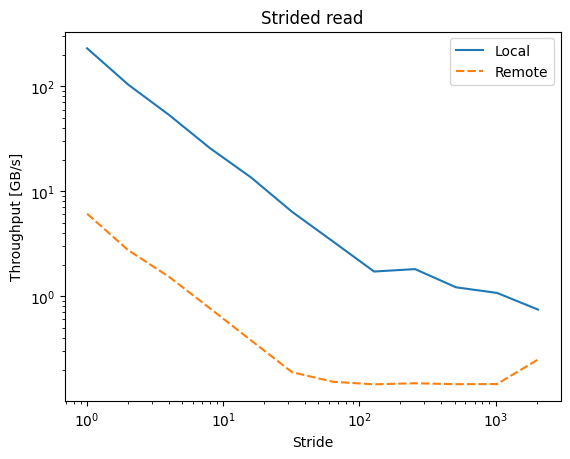

In [13]:
df = pd.concat([load("bm_access_strided_read_local.csv", ["s", "Local"]), 
                load("bm_access_strided_read_remote_1.csv", ["s1", "Remote_1"]),
                load("bm_access_strided_read_remote_2.csv", ["s2", "Remote_2"]),
                load("bm_access_strided_read_remote_3.csv", ["s3", "Remote_3"])
                
                ], axis=1)
df = df \
  .set_index("s") \
  .drop(["s1", "s2", "s3"], axis=1)

df["Remote"] = ( df["Remote_1"] + df["Remote_2"] + df["Remote_3"] ) / 3
df = df.drop(["Remote_1", "Remote_2", "Remote_3"], axis=1)
# df

ax = sns.lineplot(data=df)
ax.set_title("Strided read")
plt.xscale("log")
plt.yscale("log")
ax.set(ylabel="Throughput [GB/s]", xlabel="Stride")

[Text(0, 0.5, 'Throughput [GB/s]'), Text(0.5, 0, 'Stride')]

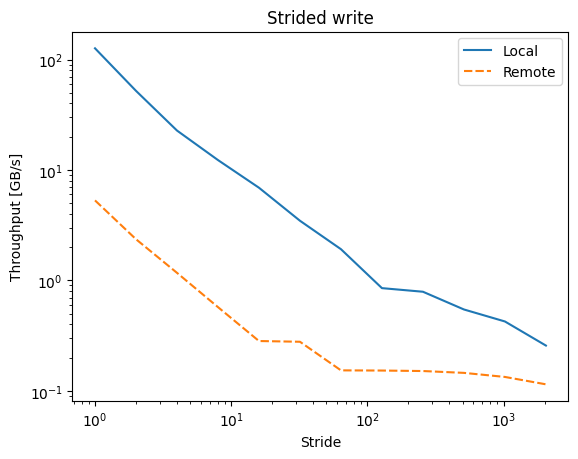

In [14]:
df = pd.concat([load("bm_access_strided_write_local.csv", ["s", "Local"]), 
                load("bm_access_strided_write_remote.csv", ["s1", "Remote"])
                
                ], axis=1)
df = df \
  .set_index("s") \
  .drop(["s1"], axis=1)

# df

ax = sns.lineplot(data=df)
ax.set_title("Strided write")
plt.xscale("log")
plt.yscale("log")
ax.set(ylabel="Throughput [GB/s]", xlabel="Stride")

In [17]:
df_local = load("bm_datatypes_local.csv", ["w/r", "Bit width", "Threads", "Throughput"])
df_remote = load("bm_datatypes_remote.csv", ["w/r", "Bit width", "Threads", "Throughput"])

df_local["Remote"] = "No"
df_remote["Remote"] = "Yes"

df = pd.concat([df_local, df_remote])
df["Threads"] = df["Threads"].astype("category")
df["Bit width"] = df["Bit width"].astype("category")

df["Direction"] = "NONE"
df.loc[df["w/r"] == 0, 'Direction'] = "Write"
df.loc[df["w/r"] == 1, 'Direction'] = "Read"
# df = df.set_index("Bit width")
df

,w/r,Bit width,Threads,Throughput,Remote,Direction
0,0,8,1,1.15488,No,Write
1,0,16,1,5.70849,No,Write
2,0,32,1,7.56865,No,Write
3,0,64,1,10.17340,No,Write
4,0,8,4,4.95779,No,Write
5,0,16,4,28.43160,No,Write
6,0,32,4,43.03660,No,Write
7,0,64,4,9.12642,No,Write
8,0,8,48,5.24325,No,Write
9,0,16,48,65.41340,No,Write


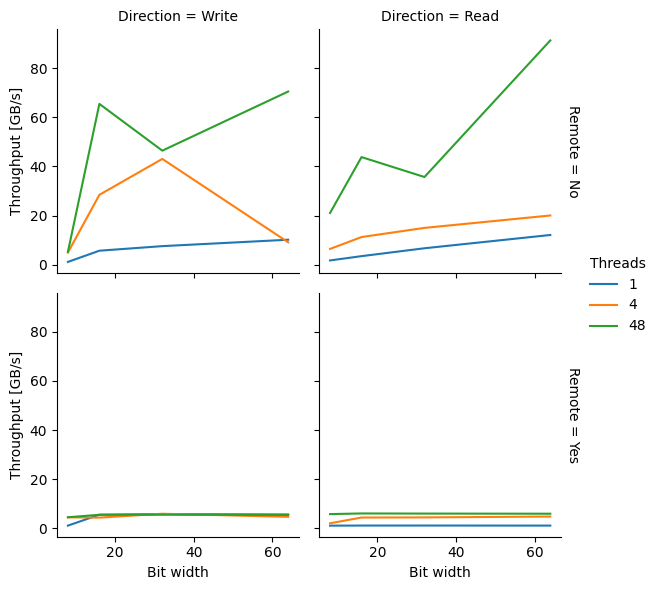

In [23]:
g = sns.FacetGrid(df, row="Remote", col="Direction", hue="Threads", margin_titles=True)
g.map(sns.lineplot, "Bit width", "Throughput")
g.add_legend()
g.set_axis_labels("Bit width", "Throughput [GB/s]")


In [26]:
df = pd.concat([load("bm_malloc_local.csv", ["Local"]), load("bm_malloc_remote.csv", ["Remote"])], axis=1)
df.describe()

,Local,Remote
count,10.000000,10.000000
mean,3.130525,4.988670
std,0.478940,0.862351
min,2.286840,3.596790
25%,2.804440,4.391825
50%,3.137410,5.186720
75%,3.517087,5.754635
max,3.778710,5.847690
